## 入门

### 什么是符号计算?

符号计算象征性地处理数学对象的计算。 这意味着数学对象可以精确地而不是近似地表示，带有未赋值变量的数学表达式以符号形式保留。

下面将以一个示例来表述通过Python内建的函数来计算开平方。以数学的方式计算如下: 

In [6]:
import math
math.sqrt(9)

3.0

9是一个完全平方数，所以我们可以获得精确的解 3。但是在对非完全平方数做开方运算时会获得一个不精确的数值。

In [7]:
import math
math.sqrt(8)

2.8284271247461903

这里获得的是一个近似解。2.82842712475 并不是8精确的平方根（实际上8的平方根不能被描述为一个有理数）。如果我们仅仅关心十进制的8的平方根，看似可以解决。

但是如果需要做到更好，例如 sqrt(8) = 2*sqrt(2)。从上面的结果中推断出来就非常的困难。这就是符号运算的用武之地。对于像SymPy这样的符号计算系统，默认情况下，对不为完全平方数数字平方根不进行求值。

In [8]:
import sympy
sympy.sqrt(3)

sqrt(3)

此外，这里我们可以看到符号计算的真正功能，符号化的结果可以简化。

In [4]:
import sympy
sympy.sqrt(8)

2*sqrt(2)

### 一个更有趣示例

下面的例子开始展示我们如何精确的操作无理数数字通过SymPy. 诸如SymPy之类的符号计算系统(通常也称之为计算机代数系统，或简称CAS)能够计算带变量的符号表达式。

下面我们将看到在SymPy, 变量被定义为符号。不像许多符号操作系统，变量在SymPy必须在他们使用前被定义（具体的原因会在下一节介绍)。让我们定义一个符号表达式，描述数学表达式 **x+2y**

In [5]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2*y
expr

x + 2*y

注意我们所写的x + 2*y 就像x和y时普通的变量一样。但在这种情况下，表达式不求值，而是保持为x + 2*y。现在让我们来改进一下: 

In [9]:
expr + 1

x + 2*y + 1

In [10]:
expr - x

2*y

注意在下面的示例中，当要求计算`expr -x`，我们不会获得`x + 2*y -x`，而是`2*y`。x和-x将会被化简。这类似于`sqrt(8)`会被自动的转换为`2*sqrt(2)`。不止如此还可以: 

In [13]:
x * expr

x*(x + 2*y)

In [14]:
x - x

0

这里我们也许期望`x(x + 2y)`转换为`x**2 + 2*x*y`，但实际我们只获得左边的部分。化简不会被自动触发，因为在不同的场景下可能有不同的用途。在SymPy提供了这些转换的方法。

In [16]:
from sympy import expand, factor
expanded_expr = expand(x*expr)
expanded_expr

x**2 + 2*x*y

In [18]:
factor(expanded_expr)

x*(x + 2*y)

### 符号计算的威力

真正符号计算系统类似SymPy是能够进行各种符号计算的。SymPy可以化简表达式，计算导数，积分和极限，求解方程式，使用矩阵，等等，而且都可以象征性的完成。它包括绘图，打印（如数学公式的2D漂亮打印输出或LATEX)，代码生成，物理，统计，组合，数论，几何，逻辑等模块。这些是也仍然是SymPy抽象计算能力的一小部分。

下面我们会进行一个关于漂亮打印的完整功能的展现: 

In [1]:
from sympy import *
x, t, z, nu = symbols('x t z nu')
init_printing(use_unicode=True)
diff(sin(x)*exp(x), x)

In [2]:
latex(diff(sin(x)*exp(x), x))

'e^{x} \\sin{\\left (x \\right )} + e^{x} \\cos{\\left (x \\right )}'

In [5]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

In [4]:
latex(integrate(exp(x)*sin(x) + exp(x)*cos(x), x))

'e^{x} \\sin{\\left (x \\right )}'

In [21]:
integrate(sin(x**2), (x, -oo, oo))

In [22]:
limit(sin(x)/x, x, 0)

In [23]:
solve(x**2 - 2, x)

In [25]:
y = Function('y')
dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t))

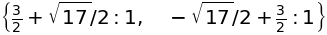

In [26]:
Matrix([[1, 2], [2, 2]]).eigenvals()

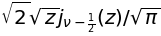

In [27]:
besselj(nu, z).rewrite(jn)

In [28]:
latex(Integral(cos(x)**2, (x, 0, pi)))

'\\int_{0}^{\\pi} \\cos^{2}{\\left (x \\right )}\\, dx'

### 为什么使用SymPy?

有许多计算机代数系统。这篇维基百科文章(https://en.wikipedia.org/wiki/List_of_computer_algebra_systems)列出了其中的许多内容。是什么让SymPy比其他选择更好？

首先，SymPy是完全免费的。它是开源的，并获得了BSD的自由许可，因此您可以修改源代码，甚至可以出售。这与流行的商业系统（如Maple或Mathematica）形成鲜明对比，后者的许可费用为数百美元。

其次，SymPy使用Python。大多数计算机代数系统发明了自己的语言。不是SymPy。 SymPy完全用Python编写，并且完全用Python执行。这意味着，如果您已经了解Python，那么使用SymPy就会更容易上手，因为您已经知道语法（如果您不了解Python，它真的很容易学习）。Python是一种经过精心设计，经过考验的语言。 SymPy开发人员对自己编写数学软件的能力充满信心，但编程语言设计则完全不同。通过重用现有的语言，我们可以专注于重要的事情：数学。

Sage是另一个计算机代数系统，也使用Python作为其语言。但是Sage很大，下载量超过1 GB。 SymPy的优点是轻巧。除了相对较小外，它除了Python外没有其他依赖项，因此几乎可以在任何地方使用它。此外，Sage的目标和SymPy的目标是不同的。 Sage旨在成为一个功能齐全的数学系统，并通过将所有主要的开放源代码数学系统整合为一个系统来实现这一目标。当您在Sage中调用某些功能（例如集成）时，它将调用其中包含的一个开源软件包。实际上，SymPy包含在Sage中。另一方面，SymPy旨在成为一个独立的系统，其所有功能都在SymPy本身中实现。

SymPy的最后一个重要功能是可以用作库。许多计算机代数系统专注于在交互式环境中使用，但是如果您希望自动化或扩展它们，则很难做到。使用SymPy，您可以轻松地在交互式Python环境中使用它，也可以将其导入自己的Python应用程序中。 SymPy还提供API，可轻松使用您自己的自定义函数对其进行扩展。